In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
import os

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8887783606318731759
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8450148255514140244
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4453898163470070761
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7304675328
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14654891607109410805
physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"
]


In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
# tf.debugging.set_log_device_placement(True)

Num GPUs Available:  1


In [5]:
path = '/content/drive/My Drive/IIITH/GCN_KEGG/GCN_patient_matrix'

In [6]:
labels = '/content/drive/My Drive/IIITH/GCN_KEGG/KEGG_csv/subtypes_labels.csv'
y = pd.read_csv(labels, header=None)

In [7]:
train_x = []
test_x = []

In [8]:
for patient in range(889):
  filename = str(patient) + '.csv'
  print(filename)
  df = pd.read_csv(os.path.join(path,str(filename)), header=None)
  if patient<711:
    train_x.append(df.to_numpy())
  else:
    test_x.append(df.to_numpy())

0.csv
1.csv
2.csv
3.csv
4.csv
5.csv
6.csv
7.csv
8.csv
9.csv
10.csv
11.csv
12.csv
13.csv
14.csv
15.csv
16.csv
17.csv
18.csv
19.csv
20.csv
21.csv
22.csv
23.csv
24.csv
25.csv
26.csv
27.csv
28.csv
29.csv
30.csv
31.csv
32.csv
33.csv
34.csv
35.csv
36.csv
37.csv
38.csv
39.csv
40.csv
41.csv
42.csv
43.csv
44.csv
45.csv
46.csv
47.csv
48.csv
49.csv
50.csv
51.csv
52.csv
53.csv
54.csv
55.csv
56.csv
57.csv
58.csv
59.csv
60.csv
61.csv
62.csv
63.csv
64.csv
65.csv
66.csv
67.csv
68.csv
69.csv
70.csv
71.csv
72.csv
73.csv
74.csv
75.csv
76.csv
77.csv
78.csv
79.csv
80.csv
81.csv
82.csv
83.csv
84.csv
85.csv
86.csv
87.csv
88.csv
89.csv
90.csv
91.csv
92.csv
93.csv
94.csv
95.csv
96.csv
97.csv
98.csv
99.csv
100.csv
101.csv
102.csv
103.csv
104.csv
105.csv
106.csv
107.csv
108.csv
109.csv
110.csv
111.csv
112.csv
113.csv
114.csv
115.csv
116.csv
117.csv
118.csv
119.csv
120.csv
121.csv
122.csv
123.csv
124.csv
125.csv
126.csv
127.csv
128.csv
129.csv
130.csv
131.csv
132.csv
133.csv
134.csv
135.csv
136.csv
137.csv
138.cs

In [9]:
train_x = np.asarray(train_x)
test_x = np.asarray(test_x)

In [10]:
train_x.shape, test_x.shape

((711, 111, 3), (178, 111, 3))

In [11]:
Y = y.values
Y = Y.astype('float32') 

In [12]:
Y.shape

(889, 1)

In [13]:
Y

array([[1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],

# Custom Attention Model

In [14]:
from tensorflow.keras import layers

In [15]:
# Defining pathway attention

class Pathway_Attention(layers.Layer):

  def __init__(self, a, d, p):
    super(Pathway_Attention, self).__init__()
    self.units = a
    self.input_dim = d
    self.alpha_dim = p

    self.w = self.add_weight(shape=(self.input_dim, self.units),
                             initializer='random_normal',
                             trainable=True)
    self.b = self.add_weight(shape=(self.units,),
                             initializer='zeros',
                             trainable=True)
    self.u = self.add_weight(shape=(self.units,),
                             initializer='random_normal',
                             trainable=True)
    self.alpha = self.add_weight(shape=(self.alpha_dim,),
                             initializer='zeros',
                             trainable=False)

  def call(self, inputs):
    y_att = tf.math.tanh(tf.matmul(inputs, self.w) + self.b)
    logits = tf.linalg.matvec(y_att, self.u)
    # print(logits.shape)
    self.alpha = tf.nn.softmax(logits)
    return tf.transpose(tf.linalg.matvec(tf.transpose(inputs), self.alpha))


In [16]:
class EnsembleBlock(layers.Layer):

  def __init__(self):
    super(EnsembleBlock, self).__init__()
    self.ensemble_1 = Pathway_Attention(a=4, d=3, p=111)
    self.ensemble_2 = Pathway_Attention(a=4, d=3, p=111)
    self.ensemble_3 = Pathway_Attention(a=4, d=3, p=111)
    self.ensemble_4 = Pathway_Attention(a=4, d=3, p=111)
    self.ensemble_5 = Pathway_Attention(a=4, d=3, p=111)
    self.ensemble_6 = Pathway_Attention(a=4, d=3, p=111)
    self.ensemble_7 = Pathway_Attention(a=4, d=3, p=111)
    self.ensemble_8 = Pathway_Attention(a=4, d=3, p=111)
    self.ensemble_9 = Pathway_Attention(a=4, d=3, p=111)
    self.ensemble_10 = Pathway_Attention(a=4, d=3, p=111)
    self.ensemble_11 = Pathway_Attention(a=4, d=3, p=111)
    self.final = Pathway_Attention(a=4, d=3, p=11)

  def call(self, inputs):
    h1 = self.ensemble_1(inputs)
    h2 = self.ensemble_2(inputs)
    h3 = self.ensemble_3(inputs)
    h4 = self.ensemble_4(inputs)
    h5 = self.ensemble_5(inputs)
    h6 = self.ensemble_6(inputs)
    h7 = self.ensemble_7(inputs)
    h8 = self.ensemble_8(inputs)
    h9 = self.ensemble_9(inputs)
    h10 = self.ensemble_10(inputs)
    h11 = self.ensemble_11(inputs)
    h_mgd = [h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11]
    h_mgd = tf.convert_to_tensor(h_mgd, dtype=tf.float32)
    return self.final(h_mgd)


In [17]:
class MAE_Model(tf.keras.Model):

    def __init__(self):
        super(MAE_Model, self).__init__()
        self.h_fin = EnsembleBlock()
        # self.ipt = tf.keras.layers.InputLayer(input_shape=(3,1), batch_size=None)
        self.fc_1 = tf.keras.layers.Dense(16, activation='relu')
        self.fc_2 = tf.keras.layers.Dense(8, activation='relu')
        self.classifier = tf.keras.layers.Dense(3, activation='softmax')

    def call(self, inputs):
        x = self.h_fin(inputs)
        x = tf.expand_dims(x, axis=0)
        # print(x)
        # x = self.ipt(x)
        x = self.fc_1(x)
        x = self.fc_2(x)
        return self.classifier(x)


In [31]:
mae = MAE_Model()

In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
ce_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

In [33]:
acc_metric = tf.keras.metrics.Accuracy()

In [34]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [35]:
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [36]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, Y[0:711]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_x, Y[711:]))

In [37]:
epochs = 10

for epoch in range(epochs):
  print('Start of epoch %d' % (epoch,))

  # Iterate over the batches of the dataset.
  for tx, ty in train_dataset:
    with tf.GradientTape() as tape:
      preds = mae(tx)
      # Compute reconstruction loss
      # ty = tf.one_hot(ty, depth=3)
      # print(preds, train_y)
      # ty = tf.reshape(ty, (1,3))
      # print(y_train)
      loss = ce_loss_fn(ty, preds)
      # print(loss)

    grads = tape.gradient(loss, mae.trainable_weights)
    optimizer.apply_gradients(zip(grads, mae.trainable_weights))

    acc_metric.update_state(ty, np.argmax(preds))

  print('epoch %s: train mean accc = %s' % (epoch, acc_metric.result()))

Start of epoch 0

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

epoch 0: train mean accc = tf.Tensor(0.8874824, shape=(), dtype=float32)
Start of epoch 1
epoch 1: train mean accc = tf.Tensor(0.92686355, shape=(), dtype=float32)
Start of epoch 2
epoch 2: train mean accc = tf.Tensor(0.9413971, shape=(), dtype=float32)
Start of epoch 3
epoch 3: train mean accc = tf.Tensor(0.9493671, shape=(), dtype=float32)
Start of epoch 4
epoch 4: train mean accc = tf.Tensor(0.95414907, shape=(), dtype=float32)
Start of epoch 5
epoch 5: train mean accc = tf.Tensor(0.

In [38]:
y_test_preds = []
y_true = []

In [39]:
for t1x, t1y in test_dataset:
   p = mae(t1x)
   y_test_preds.append(tf.argmax(p, axis=-1))
   y_true.append(t1y)

In [40]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_test_preds, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.93      0.96        58
     class 1       0.97      0.99      0.98       104
     class 2       0.89      1.00      0.94        16

    accuracy                           0.97       178
   macro avg       0.95      0.97      0.96       178
weighted avg       0.97      0.97      0.97       178



<BarContainer object of 111 artists>

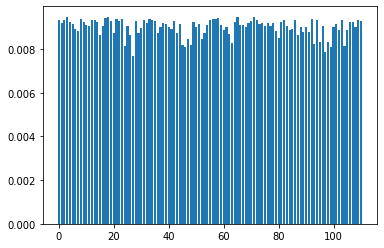

In [42]:
import matplotlib.pyplot as plt
x = [i for i in range(111)]
plt.bar(x, mae.h_fin.ensemble_2.alpha)

In [ ]:
df = pd.DataFrame(mae.h_fin.ensemble_1.alpha.numpy())

In [ ]:
pathway_file_map = {'hsa04064 .csv': 0, 'hsa01522 .csv': 1, 'hsa04066 .csv': 2, 'hsa03320 .csv': 3, 'hsa04068 .csv': 4, 'hsa04010 .csv': 5, 'hsa04071 .csv': 6, 'hsa04012 .csv': 7, 'hsa04072 .csv': 8, 'hsa04014 .csv': 9, 'hsa04110 .csv': 10, 'hsa04015 .csv': 11, 'hsa04115 .csv': 12, 'hsa04020 .csv': 13, 'hsa04137 .csv': 14, 'hsa04022 .csv': 15, 'hsa04140 .csv': 16, 'hsa04024 .csv': 17, 'hsa04144 .csv': 18, 'hsa04145 .csv': 19, 'hsa04062 .csv': 20, 'hsa04150 .csv': 21, 'hsa04151 .csv': 22, 'hsa04152 .csv': 23, 'hsa04210 .csv': 24, 'hsa04211 .csv': 25, 'hsa04216 .csv': 26, 'hsa04217 .csv': 27, 'hsa04218 .csv': 28, 'hsa04261 .csv': 29, 'hsa04270 .csv': 30, 'hsa04310 .csv': 31, 'hsa04340 .csv': 32, 'hsa04350 .csv': 33, 'hsa04360 .csv': 34, 'hsa04370 .csv': 35, 'hsa04371 .csv': 36, 'hsa04380 .csv': 37, 'hsa04390 .csv': 38, 'hsa04510 .csv': 39, 'hsa04520 .csv': 40, 'hsa04530 .csv': 41, 'hsa04550 .csv': 42, 'hsa04610 .csv': 43, 'hsa04611 .csv': 44, 'hsa04620 .csv': 45, 'hsa04621 .csv': 46, 'hsa04622 .csv': 47, 'hsa04623 .csv': 48, 'hsa04625 .csv': 49, 'hsa04630 .csv': 50, 'hsa04650 .csv': 51, 'hsa04657 .csv': 52, 'hsa04658 .csv': 53, 'hsa04659 .csv': 54, 'hsa04660 .csv': 55, 'hsa04662 .csv': 56, 'hsa04664 .csv': 57, 'hsa04666 .csv': 58, 'hsa04668 .csv': 59, 'hsa04670 .csv': 60, 'hsa04713 .csv': 61, 'hsa04714 .csv': 62, 'hsa04720 .csv': 63, 'hsa04722 .csv': 64, 'hsa04723 .csv': 65, 'hsa04724 .csv': 66, 'hsa04725 .csv': 67, 'hsa04726 .csv': 68, 'hsa04728 .csv': 69, 'hsa04730 .csv': 70, 'hsa04750 .csv': 71, 'hsa04810 .csv': 72, 'hsa04910 .csv': 73, 'hsa04911 .csv': 74, 'hsa04912 .csv': 75, 'hsa04913 .csv': 76, 'hsa04915 .csv': 77, 'hsa04916 .csv': 78, 'hsa04917 .csv': 79, 'hsa04918 .csv': 80, 'hsa04919 .csv': 81, 'hsa04920 .csv': 82, 'hsa04921 .csv': 83, 'hsa04922 .csv': 84, 'hsa04923 .csv': 85, 'hsa04924 .csv': 86, 'hsa04925 .csv': 87, 'hsa04926 .csv': 88, 'hsa04927 .csv': 89, 'hsa04928 .csv': 90, 'hsa04929 .csv': 91, 'hsa04935 .csv': 92, 'hsa04960 .csv': 93, 'hsa04961 .csv': 94, 'hsa04962 .csv': 95, 'hsa04970 .csv': 96, 'hsa04971 .csv': 97, 'hsa04972 .csv': 98, 'hsa04973 .csv': 99, 'hsa04976 .csv': 100, 'hsa04978 .csv': 101, 'hsa04979 .csv': 102, 'hsa05200 .csv': 103, 'hsa05202 .csv': 104, 'hsa05204 .csv': 105, 'hsa05205 .csv': 106, 'hsa05211 .csv': 107, 'hsa05230 .csv': 108, 'hsa05231 .csv': 109, 'hsa05235 .csv': 110}

In [ ]:
# list out keys and values separately 
key_list = list(pathway_file_map.keys()) 
val_list = list(pathway_file_map.values()) 

In [ ]:
df['pathway'] = key_list

In [ ]:
df

,0,pathway
0,0.008568,hsa04064 .csv
1,0.008363,hsa01522 .csv
2,0.008816,hsa04066 .csv
3,0.008191,hsa03320 .csv
4,0.009655,hsa04068 .csv
...,...,...
106,0.009747,hsa05205 .csv
107,0.008217,hsa05211 .csv
108,0.011075,hsa05230 .csv
109,0.008168,hsa05231 .csv


In [ ]:
full_dataset = tf.data.Dataset.from_tensor_slices((X, y))

In [ ]:
pathway_scores = []

In [ ]:
for patient, label in full_dataset:
  _ = mae(patient)
  scores = mae.h_fin.ensemble_1.alpha.numpy()
  scores_norm = scores/np.linalg.norm(scores)
  pathway_scores.append(scores_norm)

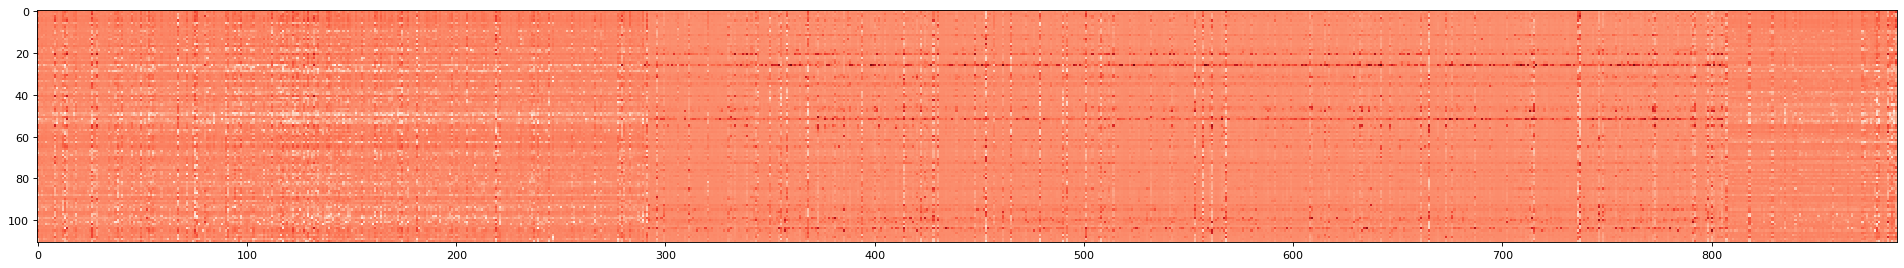

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 60), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(np.asarray(pathway_scores).T, cmap='Reds', interpolation='nearest')
plt.show()

In [ ]:
pathway_scores[410][26]

0.103631556

In [ ]:
pathway_scores[101][26]

0.08920976

In [ ]:
pathway_scores[830][26]

0.08869826

In [ ]:
key_list[26] #Ferroptosis

'hsa04216 .csv'

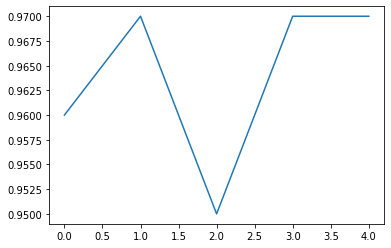

In [ ]:
import matplotlib.pyplot as plt
plt.plot([0.96, 0.97, 0.95, 0.97, 0.97])

In [ ]:
pathway_scores_df = pd.DataFrame(pathway_scores, columns=key_list)

In [ ]:
pathway_scores_df.to_csv('./pathway_scores_gcn_mae.csv')

In [ ]:
#scores for best performing pathways (individually) 
pathway_to_see = ['hsa04530 .csv', 'hsa04068 .csv', 'hsa04010 .csv', 'hsa05211 .csv']
for p in pathway_to_see:
  print(p[:-5])
  idx = pathway_file_map[p]
  kirp_score = np.mean([x[idx] for x in pathway_scores[0:290]])
  kirc_score = np.mean([x[idx] for x in pathway_scores[290:808]])
  kich_score = np.mean([x[idx] for x in pathway_scores[808:]])
  print(kirp_score, kirc_score, kich_score)

hsa04530
0.09979762 0.096965 0.09397491
hsa04068
0.09854131 0.094651714 0.096787274
hsa04010
0.09969057 0.09493622 0.09815481
hsa05211
0.09534384 0.094353616 0.09505498


In [ ]:
#scores for least performing pathways (individually) 
pathway_to_see = ['hsa04216 .csv', 'hsa04657 .csv', 'hsa04973 .csv']
for p in pathway_to_see:
  print(p[:-5])
  idx = pathway_file_map[p]
  kirp_score = np.mean([x[idx] for x in pathway_scores[0:290]])
  kirc_score = np.mean([x[idx] for x in pathway_scores[290:808]])
  kich_score = np.mean([x[idx] for x in pathway_scores[808:]])
  print(kirp_score, kirc_score, kich_score)

hsa04216
0.08844142 0.10746749 0.093303554
hsa04657
0.090941004 0.10476122 0.09218091
hsa04973
0.089615986 0.09779966 0.09488015


In [ ]:
attention_model_stats = []

for p in key_list:
  print(p[:-5])
  idx = pathway_file_map[p]
  kirp_score = np.mean([x[idx] for x in pathway_scores[0:290]])
  kirc_score = np.mean([x[idx] for x in pathway_scores[290:808]])
  kich_score = np.mean([x[idx] for x in pathway_scores[808:]])
  variation = np.var([kirp_score, kirc_score, kich_score], ddof=1)
  diff_kirp_kirc = abs(kirp_score-kirc_score)
  diff_kirp_kich = abs(kirp_score-kich_score)
  diff_kirc_kich = abs(kirc_score-kich_score)
  attention_model_stats.append([p[:-5],kirp_score, kirc_score, kich_score, variation, diff_kirp_kirc, diff_kirp_kich, diff_kirc_kich])

hsa04064
hsa01522
hsa04066
hsa03320
hsa04068
hsa04010
hsa04071
hsa04012
hsa04072
hsa04014
hsa04110
hsa04015
hsa04115
hsa04020
hsa04137
hsa04022
hsa04140
hsa04024
hsa04144
hsa04145
hsa04062
hsa04150
hsa04151
hsa04152
hsa04210
hsa04211
hsa04216
hsa04217
hsa04218
hsa04261
hsa04270
hsa04310
hsa04340
hsa04350
hsa04360
hsa04370
hsa04371
hsa04380
hsa04390
hsa04510
hsa04520
hsa04530
hsa04550
hsa04610
hsa04611
hsa04620
hsa04621
hsa04622
hsa04623
hsa04625
hsa04630
hsa04650
hsa04657
hsa04658
hsa04659
hsa04660
hsa04662
hsa04664
hsa04666
hsa04668
hsa04670
hsa04713
hsa04714
hsa04720
hsa04722
hsa04723
hsa04724
hsa04725
hsa04726
hsa04728
hsa04730
hsa04750
hsa04810
hsa04910
hsa04911
hsa04912
hsa04913
hsa04915
hsa04916
hsa04917
hsa04918
hsa04919
hsa04920
hsa04921
hsa04922
hsa04923
hsa04924
hsa04925
hsa04926
hsa04927
hsa04928
hsa04929
hsa04935
hsa04960
hsa04961
hsa04962
hsa04970
hsa04971
hsa04972
hsa04973
hsa04976
hsa04978
hsa04979
hsa05200
hsa05202
hsa05204
hsa05205
hsa05211
hsa05230
hsa05231
hsa05235


In [ ]:
attention_model_stats

[['hsa04064',
  0.09473498,
  0.093112014,
  0.09491064,
  9.8332e-07,
  0.0016229674,
  0.00017565489,
  0.0017986223],
 ['hsa01522',
  0.09830183,
  0.09417185,
  0.09824517,
  5.608644e-06,
  0.004129976,
  5.6654215e-05,
  0.004073322],
 ['hsa04066',
  0.09758678,
  0.09549805,
  0.0972877,
  1.2758516e-06,
  0.002088733,
  0.0002990812,
  0.0017896518],
 ['hsa03320',
  0.098566554,
  0.09447985,
  0.09596106,
  4.2806214e-06,
  0.004086703,
  0.0026054978,
  0.0014812052],
 ['hsa04068',
  0.09854131,
  0.094651714,
  0.096787274,
  3.7943728e-06,
  0.003889598,
  0.001754038,
  0.00213556],
 ['hsa04010',
  0.09969057,
  0.09493622,
  0.09815481,
  5.8869537e-06,
  0.0047543496,
  0.0015357584,
  0.0032185912],
 ['hsa04071',
  0.09395921,
  0.09264879,
  0.096912175,
  4.7689437e-06,
  0.001310423,
  0.002952963,
  0.004263386],
 ['hsa04012',
  0.09792558,
  0.094637394,
  0.09760357,
  3.285675e-06,
  0.003288187,
  0.0003220141,
  0.002966173],
 ['hsa04072',
  0.0973871,
  0.0939

In [ ]:
attention_model_stats_df = pd.DataFrame(attention_model_stats)

In [ ]:
attention_model_stats_df.to_csv("attention_model_stats.csv")